In [ ]:
using Pkg
Pkg.activate("..")

push!(LOAD_PATH, "../src")
using WriterVerifier
using Plots, Images, FileIO, StatsBase

  Activating project at `c:\Users\igorp\MyProject`


Znaleziono 115320 obrazów
Załadowano 76 pisarzy z 3800 próbkami)
Średnio 50.0) próbek na pisarza
Statystyki datasetu:
Liczba pisarzy: 76
Pisarz f01: 50 próbek
Pisarz d01: 50 próbek
Pisarz g05: 50 próbek
Pisarz e07: 50 próbek


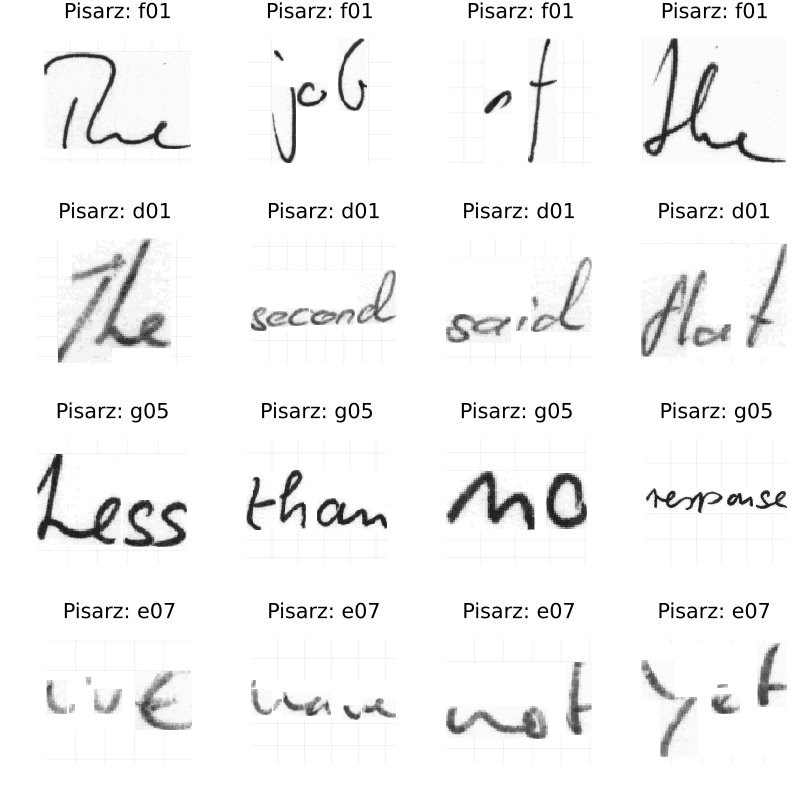

In [2]:
data_path = "../data/raw/words"

writers_data = load_iam_data(data_path);

println("Statystyki datasetu:")
println("Liczba pisarzy: $(length(writers_data))")

samples_per_writer = [length(samples for samples in values(writers_data))]


top_writers = sort(collect(writers_data), by=x->length(x[2]), rev=true)[1:min(4, length(writers_data))]

plots_array = []
for (i, (writer_id, image_paths)) in enumerate(top_writers)
    println("Pisarz $writer_id: $(length(image_paths)) próbek")

    sample_images = image_paths[1:min(4, length(image_paths))]

    writer_plots = []
    for (j, img_path) in enumerate(sample_images)
        try
            img = load(img_path)
            if ndims(img) == 3
                img = Gray.(img)
            end

            p = plot(img, title="$writer_id-$j",
                     axis=false, showaxis=false,
                     size=(100, 50))
            push!(writer_plots, p)
        catch e
            println("Błąd ładowania $img_path: $e")
        end
    end

    if !isempty(writer_plots)
        writer_combined = plot(writer_plots..., layout=(1, length(writer_plots)),
                               title="Pisarz: $writer_id")
        push!(plots_array, writer_combined)
    end
end

if !isempty(plots_array)
    final_plot = plot(plots_array..., layout=(length(plots_array), 1),
                      size=(800, 200*length(plots_array)))
    display(final_plot)
end

Test na: f01-053-00-00.png
Oryginalny rozmiar: (90, 136)
Przetworzony rozmiar: (64, 128, 1)


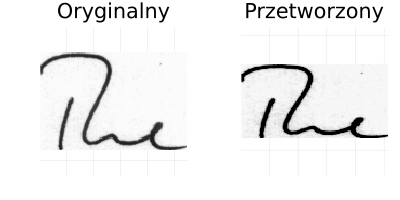

In [3]:
sample_paths = []

for (writer, paths) in writers_data
    append!(sample_paths, paths[1:min(3, length(paths))])
    if length(sample_paths) >= 50
        break
    end
end

test_path = sample_paths[1]

println("Test na: $(basename(test_path))")

try
    original = load(test_path)

    processed = preprocess_image(test_path; target_size=(64, 128))

    println("Oryginalny rozmiar: $(size(original))")
    println("Przetworzony rozmiar: $(size(processed))")


    orig_gray = ndims(original) == 3 ? Gray.(original) : original
    processed_2d = processed[:, :, 1]  # Usuń wymiar kanału do wyświetlenia

    comparison = plot(
        plot(orig_gray, title="Oryginalny", axis=false),
        plot(Gray.(processed_2d), title="Przetworzony", axis=false),
        layout=(1,2), size=(400, 200)
    )
    display(comparison)

catch e
    println("Błąd preprocessing: $e")
end
    
    

